In [1]:
import numpy as np
import pandas as pd
import datetime
from sklearn import preprocessing
pd.set_option('display.max_columns', 500)


import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("white")

In [2]:
#read in 2013 and 2014 data
data_2013 = pd.read_csv("../data/2012_13_loan_data/LoanStats3b.csv", delimiter=",", encoding='latin-1');

data_2014_a = pd.read_csv("../data/2014_loan_data/LoanStats_2014_A.csv", delimiter=",");
data_2014_b = pd.read_csv("../data/2014_loan_data/LoanStats_2014_B.csv", delimiter=",");
data_2014_c = pd.read_csv("../data/2014_loan_data/LoanStats_2014_C.csv", delimiter=",");
data_2014_d = pd.read_csv("../data/2014_loan_data/LoanStats_2014_D.csv", delimiter=",");
data_2014_full = pd.concat([data_2014_a, data_2014_b, data_2014_c, data_2014_d]);

print(data_2013.shape);
print(data_2014_full.shape)


/Users/bhavenpatel/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (47,123,124,125,128,129,130,133) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/bhavenpatel/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(134814, 145)
(235629, 145)


In [3]:
#see if both data sets have same columns
print(len(data_2013.columns))
print(len(data_2014_full.columns))
assert(np.all(data_2013.columns == data_2014_full.columns));

145
145


In [4]:
#concatenate 2013 and 2014 data
train_data = pd.concat([data_2013, data_2014_full], axis = 0);

#add column for Default status. Default=1, Paid=0
train_data['Default'] = 1;
train_data.loc[train_data.loan_status == "Fully Paid", 'Default'] = 0;
display(train_data.head());

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,Default
0,NaN,NaN,10000,10000,10000.0,36 months,9.67%,321.13,B,B1,Registered Nurse,7 years,MORTGAGE,102000.0,Not Verified,Dec-13,Fully Paid,n,NaN,NaN,debt_consolidation,Clean Up,027xx,MA,15.55,2,Oct-89,0,11.0,NaN,9,0,9912,44.40%,22,f,0.0,0.0,11560.462180,11560.46,10000.0,1560.46,0.0,0.0,0.0,Jan-17,320.91,NaN,Dec-16,0,54.0,1,Individual,NaN,NaN,NaN,0,0,39143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22300,NaN,NaN,NaN,3,4349.0,973.0,89.4,0,0,243.0,290,23,8,0,25.0,11.0,8.0,11.0,1,3,4,3,6,9,6,13,4,9,0.0,0,0,1,77.3,66.7,0,0,58486,39143,9200,36186,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,0
1,NaN,NaN,12000,12000,12000.0,36 months,6.62%,368.45,A,A2,MANAGER INFORMATION DELIVERY,10+ years,MORTGAGE,105000.0,Not Verified,Dec-13,Fully Paid,n,NaN,NaN,debt_consolidation,UNIVERSAL CARD,060xx,CT,14.05,0,Mar-94,1,43.0,NaN,12,0,13168,21.60%,22,w,0.0,0.0,13263.954640,13263.95,12000.0,1263.95,0.0,0.0,0.0,Jan-17,368.20,NaN,Oct-18,0,NaN,1,Individual,NaN,NaN,NaN,0,0,267646,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61100,NaN,NaN,NaN,4,26765.0,39432.0,25.0,0,0,146.0,237,20,3,4,20.0,NaN,3.0,43.0,0,2,2,5,5,9,8,9,2,12,0.0,0,0,2,95.5,0.0,0,0,333044,42603,52600,42769,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,0
2,NaN,NaN,20800,20800,20800.0,36 months,13.53%,706.16,B,B5,Operations Manager,10+ years,RENT,81500.0,Verified,Dec-13,Fully Paid,n,NaN,Borrower added on 12/31/13 > My goal is to p...,debt_consolidation,Reducing Debt to Purchase Home,100xx,NY,16.73,0,Jun-98,2,64.0,NaN,29,0,23473,54.50%,41,f,0.0,0.0,23926.640010,

## Plot distribution of loan amounts for Paid and Defaulted loans

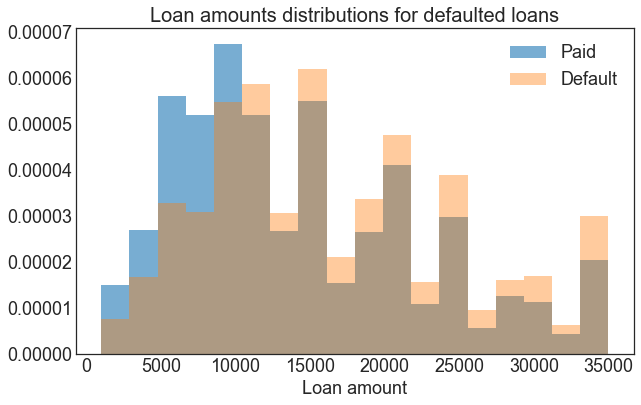

In [5]:
fig = plt.figure(figsize=(10,6));
ax = plt.subplot(1,1,1);
f_size=18;

ax.set_xlabel('Loan amount', fontsize= f_size);
ax.set_title('Loan amounts distributions for defaulted loans', fontsize=20);
ax.tick_params(labelsize=f_size)

ax.hist(train_data.loc[train_data.Default == 0, "funded_amnt"], bins=18, density=True, label='Paid', alpha=0.6);
ax.hist(train_data.loc[train_data.Default == 1, "funded_amnt"], bins=18, density=True, label='Default', alpha=0.4);


ax.legend(loc='best', fontsize=f_size);

plt.show()

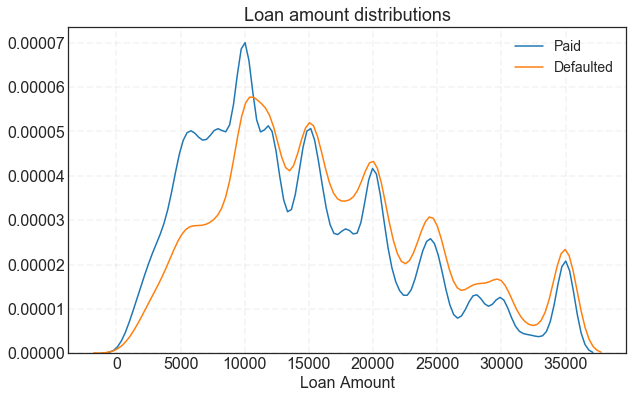

In [6]:
fig = plt.figure(figsize=(10,6));
ax = plt.subplot(1,1,1);
fontsize= 16;

ax.tick_params(labelsize=fontsize);
ax.set_xlabel(xlabel="Loan Amount", fontsize=fontsize);
ax.set_title(label="Loan amount distributions", fontsize=18)
ax.grid(True, lw=1.75, ls='--', alpha=0.2)
#plot the funded amount for loans that were paid back and those that defaulted
sns.kdeplot(data = train_data.loc[train_data['Default'] == 0, "funded_amnt"], label = "Paid", ax = ax);
sns.kdeplot(data = train_data.loc[train_data['Default'] == 1, "funded_amnt"], label = "Defaulted", ax = ax);
ax.legend(fontsize=14);

plt.show()

There is a slight left shift in the distribution for loans that were paid back, which could possibly be exploited for higher rates of return.

## Plot distribution of interest rates for Paid and Defaulted loans

In [7]:
#convert interest rates to decimals

def convert_ir(x):
    rate = float(x[:-1]);
    return rate/100;

train_data.int_rate = train_data.int_rate.map(convert_ir);
train_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,Default
0,NaN,NaN,10000,10000,10000.0,36 months,0.0967,321.13,B,B1,Registered Nurse,7 years,MORTGAGE,102000.0,Not Verified,Dec-13,Fully Paid,n,NaN,NaN,debt_consolidation,Clean Up,027xx,MA,15.55,2,Oct-89,0,11.0,NaN,9,0,9912,44.40%,22,f,0.0,0.0,11560.462180,11560.46,10000.0,1560.46,0.0,0.0,0.0,Jan-17,320.91,NaN,Dec-16,0,54.0,1,Individual,NaN,NaN,NaN,0,0,39143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22300,NaN,NaN,NaN,3,4349.0,973.0,89.4,0,0,243.0,290,23,8,0,25.0,11.0,8.0,11.0,1,3,4,3,6,9,6,13,4,9,0.0,0,0,1,77.3,66.7,0,0,58486,39143,9200,36186,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,0
1,NaN,NaN,12000,12000,12000.0,36 months,0.0662,368.45,A,A2,MANAGER INFORMATION DELIVERY,10+ years,MORTGAGE,105000.0,Not Verified,Dec-13,Fully Paid,n,NaN,NaN,debt_consolidation,UNIVERSAL CARD,060xx,CT,14.05,0,Mar-94,1,43.0,NaN,12,0,13168,21.60%,22,w,0.0,0.0,13263.954640,13263.95,12000.0,1263.95,0.0,0.0,0.0,Jan-17,368.20,NaN,Oct-18,0,NaN,1,Individual,NaN,NaN,NaN,0,0,267646,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61100,NaN,NaN,NaN,4,26765.0,39432.0,25.0,0,0,146.0,237,20,3,4,20.0,NaN,3.0,43.0,0,2,2,5,5,9,8,9,2,12,0.0,0,0,2,95.5,0.0,0,0,333044,42603,52600,42769,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,0
2,NaN,NaN,20800,20800,20800.0,36 months,0.1353,706.16,B,B5,Operations Manager,10+ years,RENT,81500.0,Verified,Dec-13,Fully Paid,n,NaN,Borrower added on 12/31/13 > My goal is to p...,debt_consolidation,Reducing Debt to Purchase Home,100xx,NY,16.73,0,Jun-98,2,64.0,NaN,29,0,23473,54.50%,41,f,0.0,0.0,23926.64001

In [8]:
train_data_intRate_gb = train_data.groupby(by='Default').agg({
    'int_rate':'mean'
})
train_data_intRate_gb

,int_rate
Default,
0,0.134466
1,0.161830


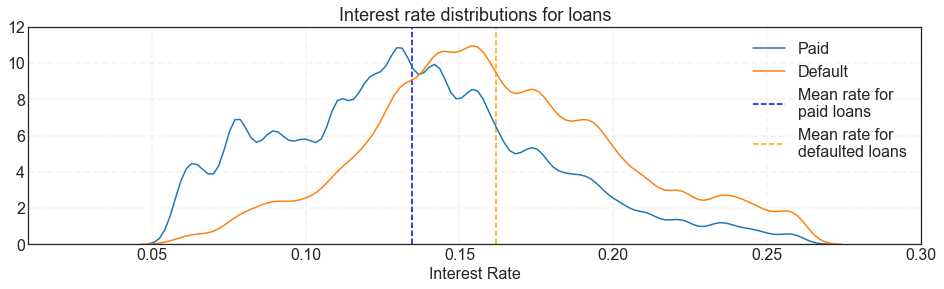

In [18]:
fig = plt.figure(figsize=(16,4));
ax = plt.subplot(1,1,1);
f_size=16;

ax.set_xlabel('Interest Rate', fontsize= f_size);
# ax.set_ylabel('Density of Distribution', fontsize= f_size);
ax.set_title('Interest rate distributions for loans', fontsize=18)
ax.set_xlim(left=0.01, right=0.3);
ax.set_ylim(bottom=0, top=12);
ax.tick_params(labelsize=f_size);
ax.grid(True, lw=1.75, ls='--', alpha=0.2)


sns.kdeplot(train_data.loc[train_data['Default'] == 0, 'int_rate'], label='Paid', ax=ax);
ax.vlines(x=train_data_intRate_gb.int_rate[0], ymin=0, ymax=12, colors='b', linestyles='dashed', label="Mean rate for \npaid loans")

sns.kdeplot(train_data.loc[train_data['Default'] == 1, 'int_rate'], label='Default', ax=ax);
ax.vlines(x=train_data_intRate_gb.int_rate[1], ymin=0, ymax=12, colors='orange', linestyles='dashed', label="Mean rate for \ndefaulted loans")

ax.legend(loc='best', fontsize=f_size);

# plt.show()
# plt.savefig('Interest_rate_distrb_for_loans.png', bbox_inches='tight');

Interest rate could also be a good predictor of defaulted loans since the distribution of interest rates for paid-back loans is shifted to the left compared to the distribution of interest rates for defaulted loans. The means of the two distributions show some separation as well.

## Plot distribution of employment years for Paid and Defaulted loans

In [10]:
train_data.emp_length.unique()

array(['7 years', '10+ years', '2 years', '5 years', '3 years', '4 years',
       '6 years', '1 year', '9 years', '8 years', '< 1 year', nan],
      dtype=object)

In [11]:
def convert_empl_years(ey):
    if ey == "10+ years":
        return 10.0;
    elif ey == "< 1 year":
        return 0.0;
    else:
        return float(ey[0]);
    
#convert years employed
train_data["years_emplyd"] = train_data["emp_length"].map(convert_empl_years, na_action='ignore');

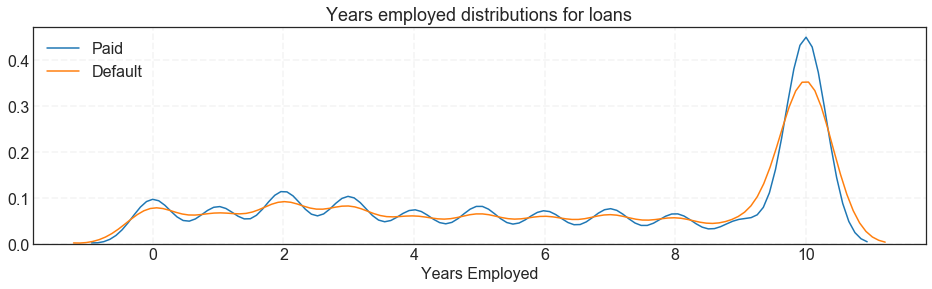

In [17]:
fig = plt.figure(figsize=(16,4));
ax = plt.subplot(1,1,1);
f_size=16;

ax.set_xlabel('Years Employed', fontsize= f_size);
# ax.set_ylabel('Density of Distribution', fontsize= f_size);
ax.set_title('Years employed distributions for loans', fontsize=18)
# ax.set_xlim(left=0.01, right=0.3);
# ax.set_ylim(bottom=0, top=12);
ax.tick_params(labelsize=f_size);
ax.grid(True, lw=1.75, ls='--', alpha=0.2)


sns.kdeplot(train_data.loc[train_data['Default'] == 0, 'years_emplyd'].dropna(), label='Paid', ax=ax);
# ax.vlines(x=train_data_intRate_gb.int_rate[0], ymin=0, ymax=12, colors='b', linestyles='dashed', label="Mean rate for \npaid loans")

sns.kdeplot(train_data.loc[train_data['Default'] == 1, 'years_emplyd'].dropna(), label='Default', ax=ax);
# ax.vlines(x=train_data_intRate_gb.int_rate[1], ymin=0, ymax=12, colors='orange', linestyles='dashed', label="Mean rate for \ndefaulted loans")

ax.legend(loc='best', fontsize=f_size);

# plt.show()
# plt.savefig('Interest_rate_distrb_for_loans.png', bbox_inches='tight');